In [230]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.decomposition import PCA

In [231]:
## warning
import warnings
warnings.filterwarnings('ignore')

In [339]:
## load our dataset
wdf = pd.read_csv('winequality-white.csv')
wdf

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [327]:
## shape of dataset, rows and columns
wdf.shape

(4898, 12)

In [328]:
## getting info about the dataset
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [329]:
wdf.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

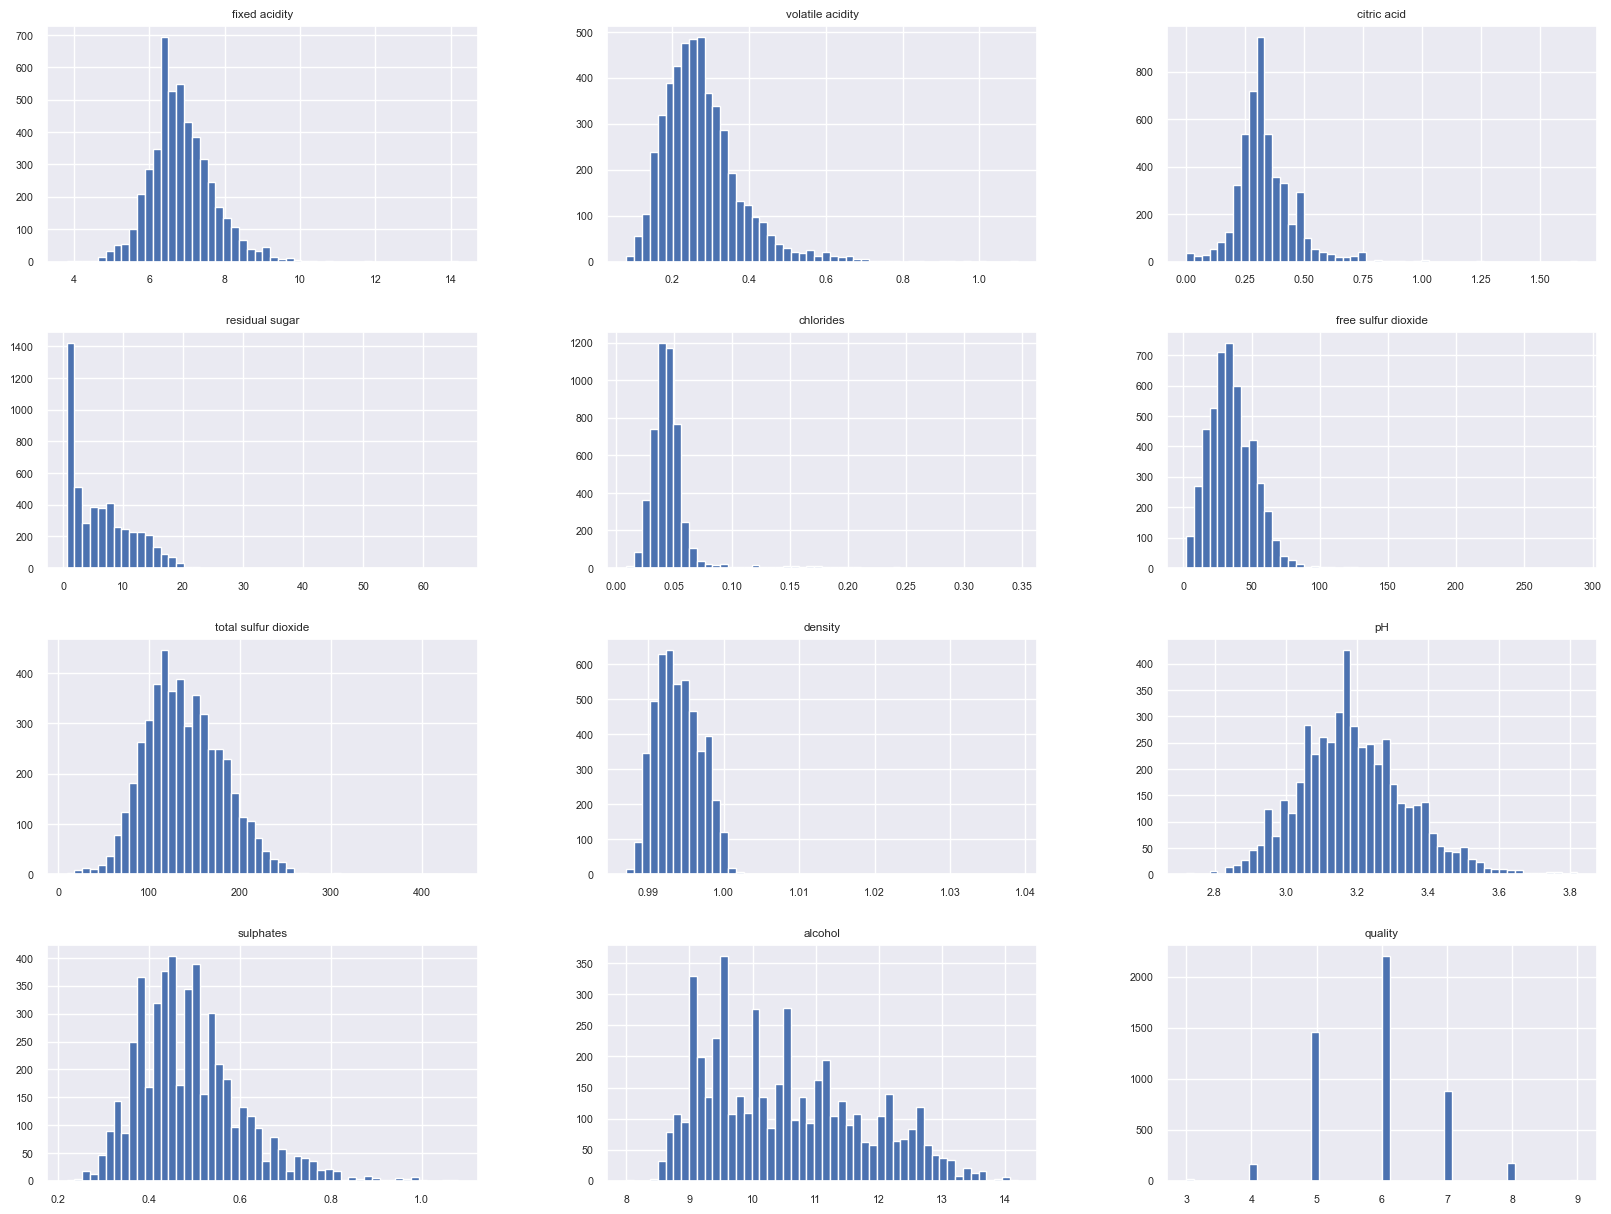

In [330]:
## calling the histogram method on the whole dataset
wdf.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='alcohol', ylabel='Density'>

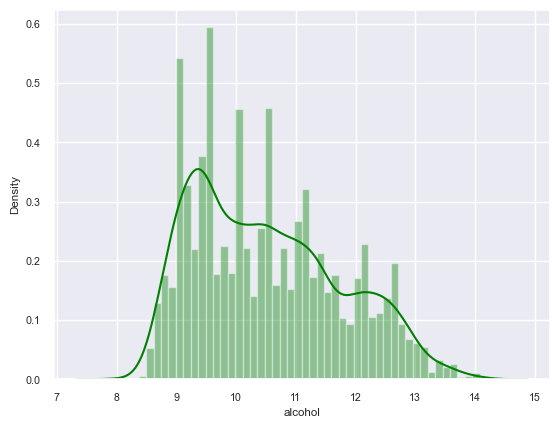

In [344]:
## kernel density estimation
sns.distplot(wdf['alcohol'], color = 'green', bins=50)

In [331]:
wdf.describe().T

count        mean        std      min         25%  \
fixed acidity         4898.0    6.854788   0.843868  3.80000    6.300000   
volatile acidity      4898.0    0.278241   0.100795  0.08000    0.210000   
citric acid           4898.0    0.334192   0.121020  0.00000    0.270000   
residual sugar        4898.0    6.391415   5.072058  0.60000    1.700000   
chlorides             4898.0    0.045772   0.021848  0.00900    0.036000   
free sulfur dioxide   4898.0   35.308085  17.007137  2.00000   23.000000   
total sulfur dioxide  4898.0  138.360657  42.498065  9.00000  108.000000   
density               4898.0    0.994027   0.002991  0.98711    0.991723   
pH                    4898.0    3.188267   0.151001  2.72000    3.090000   
sulphates             4898.0    0.489847   0.114126  0.22000    0.410000   
alcohol               4898.0   10.514267   1.230621  8.00000    9.500000   
quality               4898.0    5.877909   0.885639  3.00000    5.000000   

                            50%       75%        max  
fixed acidity           6.80000    7.3000   14.20000  
volatile acidity        0.26000    0.3200    1.10000  
citric acid             0.32000    0.3900    1.66000  
residual sugar          5.20000    9.9000   65.80000  
chlorides               0.04300    0.0500    0.34600  
free sulfur dioxide    34.00000   46.0000  289.00000  
total sulfur dioxide  134.00000  167.0000  440.00000  
density                 0.99374    0.9961    1.03898  
pH                      3.18000    3.2800    3.82000  
sulphates               0.47000    0.5500    1.08000  
alcohol                10.40000   11.4000   14.20000  
quality                 6.00000    6.0000    9.00000

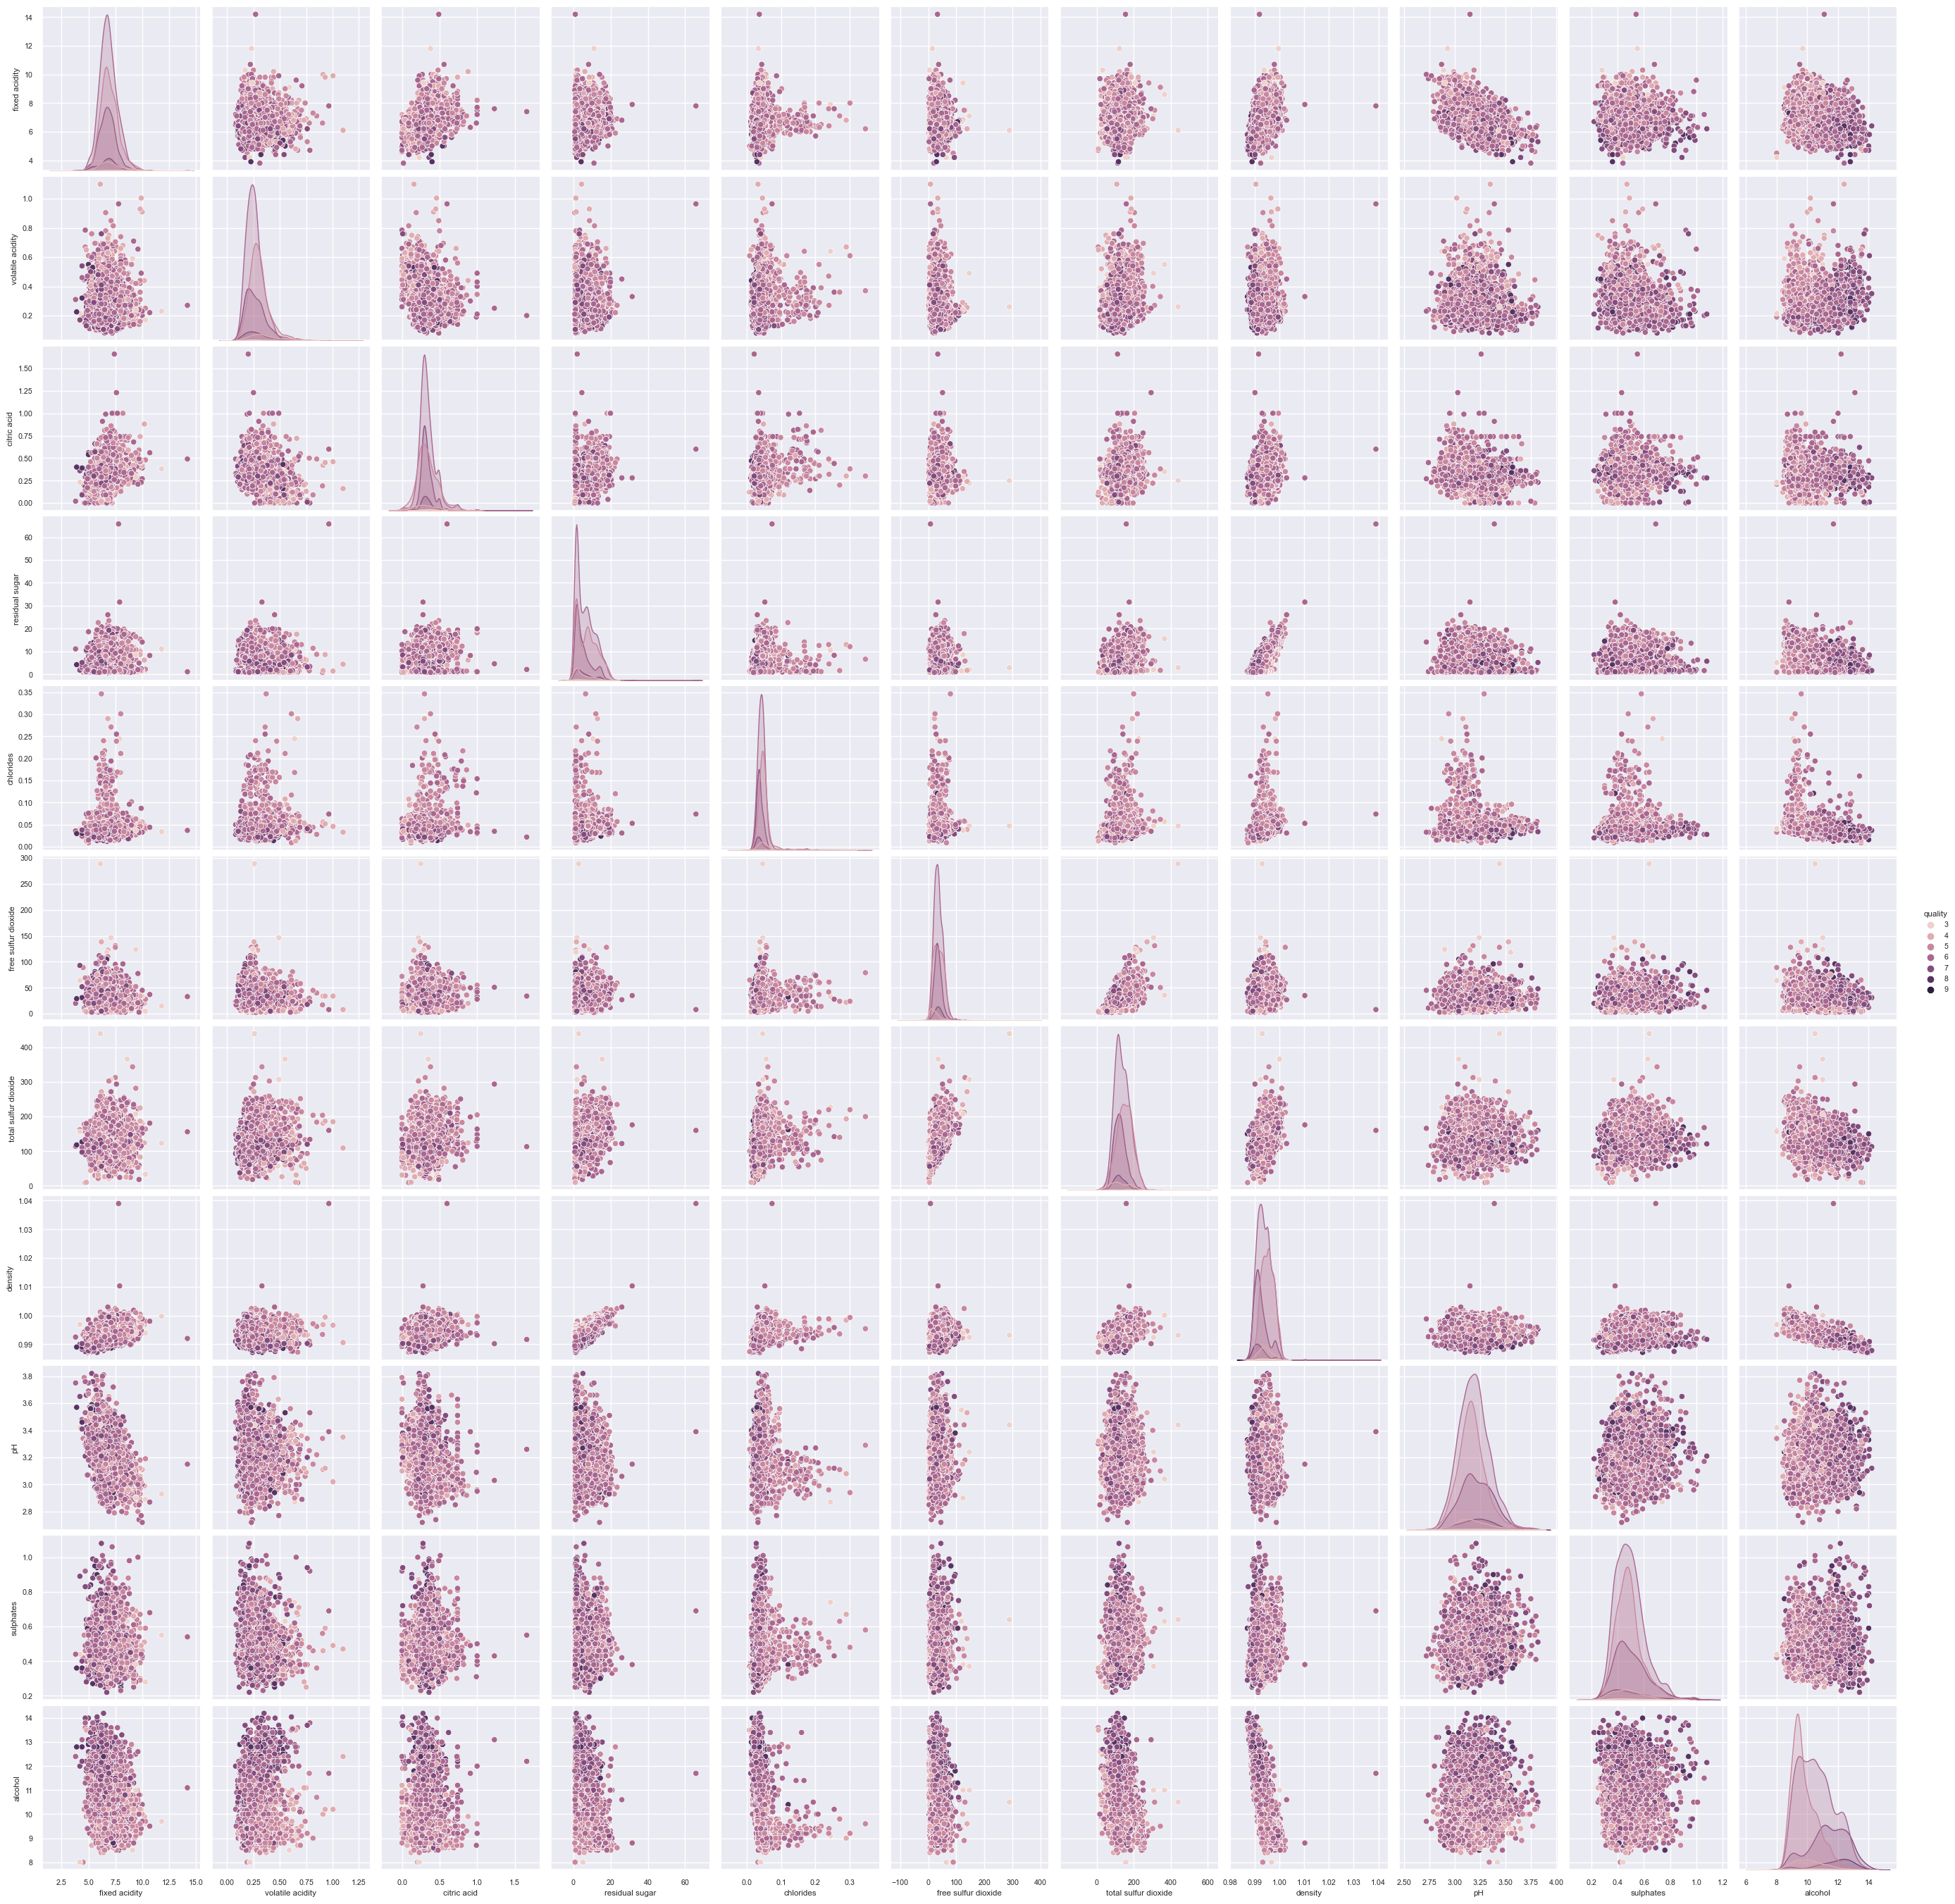

In [332]:
sns.pairplot(wdf, diag_kind="kde", markers="o", hue="quality")

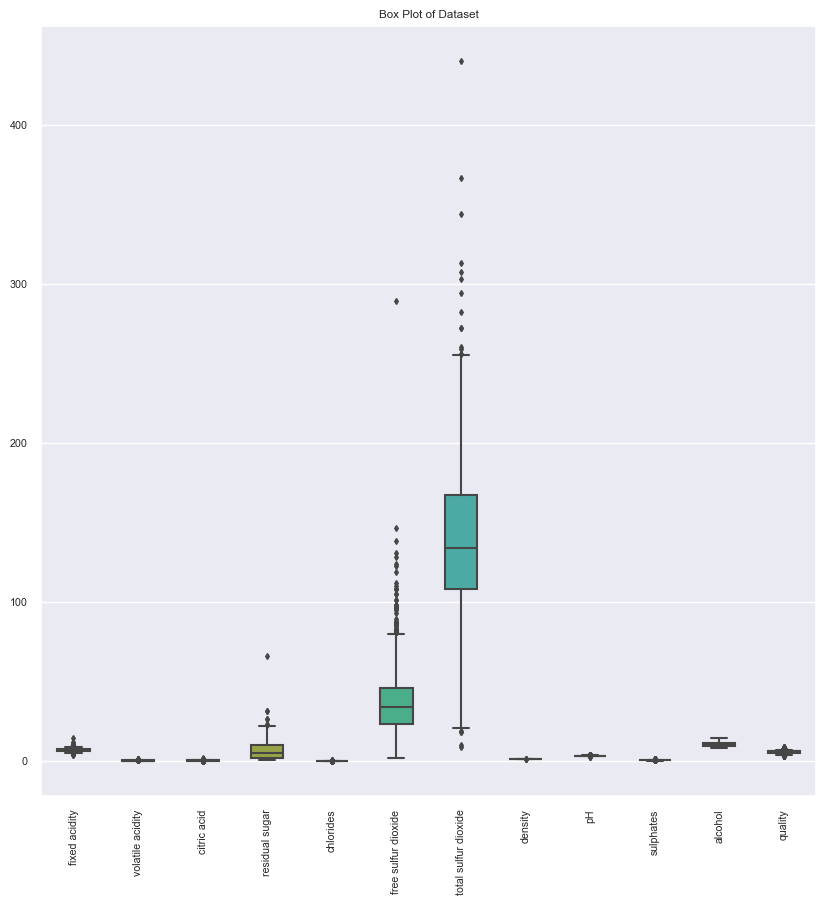

In [333]:
## calling Box plot for whole dataset
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=wdf, width= 0.5,ax=ax,  fliersize=3)
plt.title('Box Plot of Dataset', loc="center")
plt.xticks(rotation=90)
plt.show()

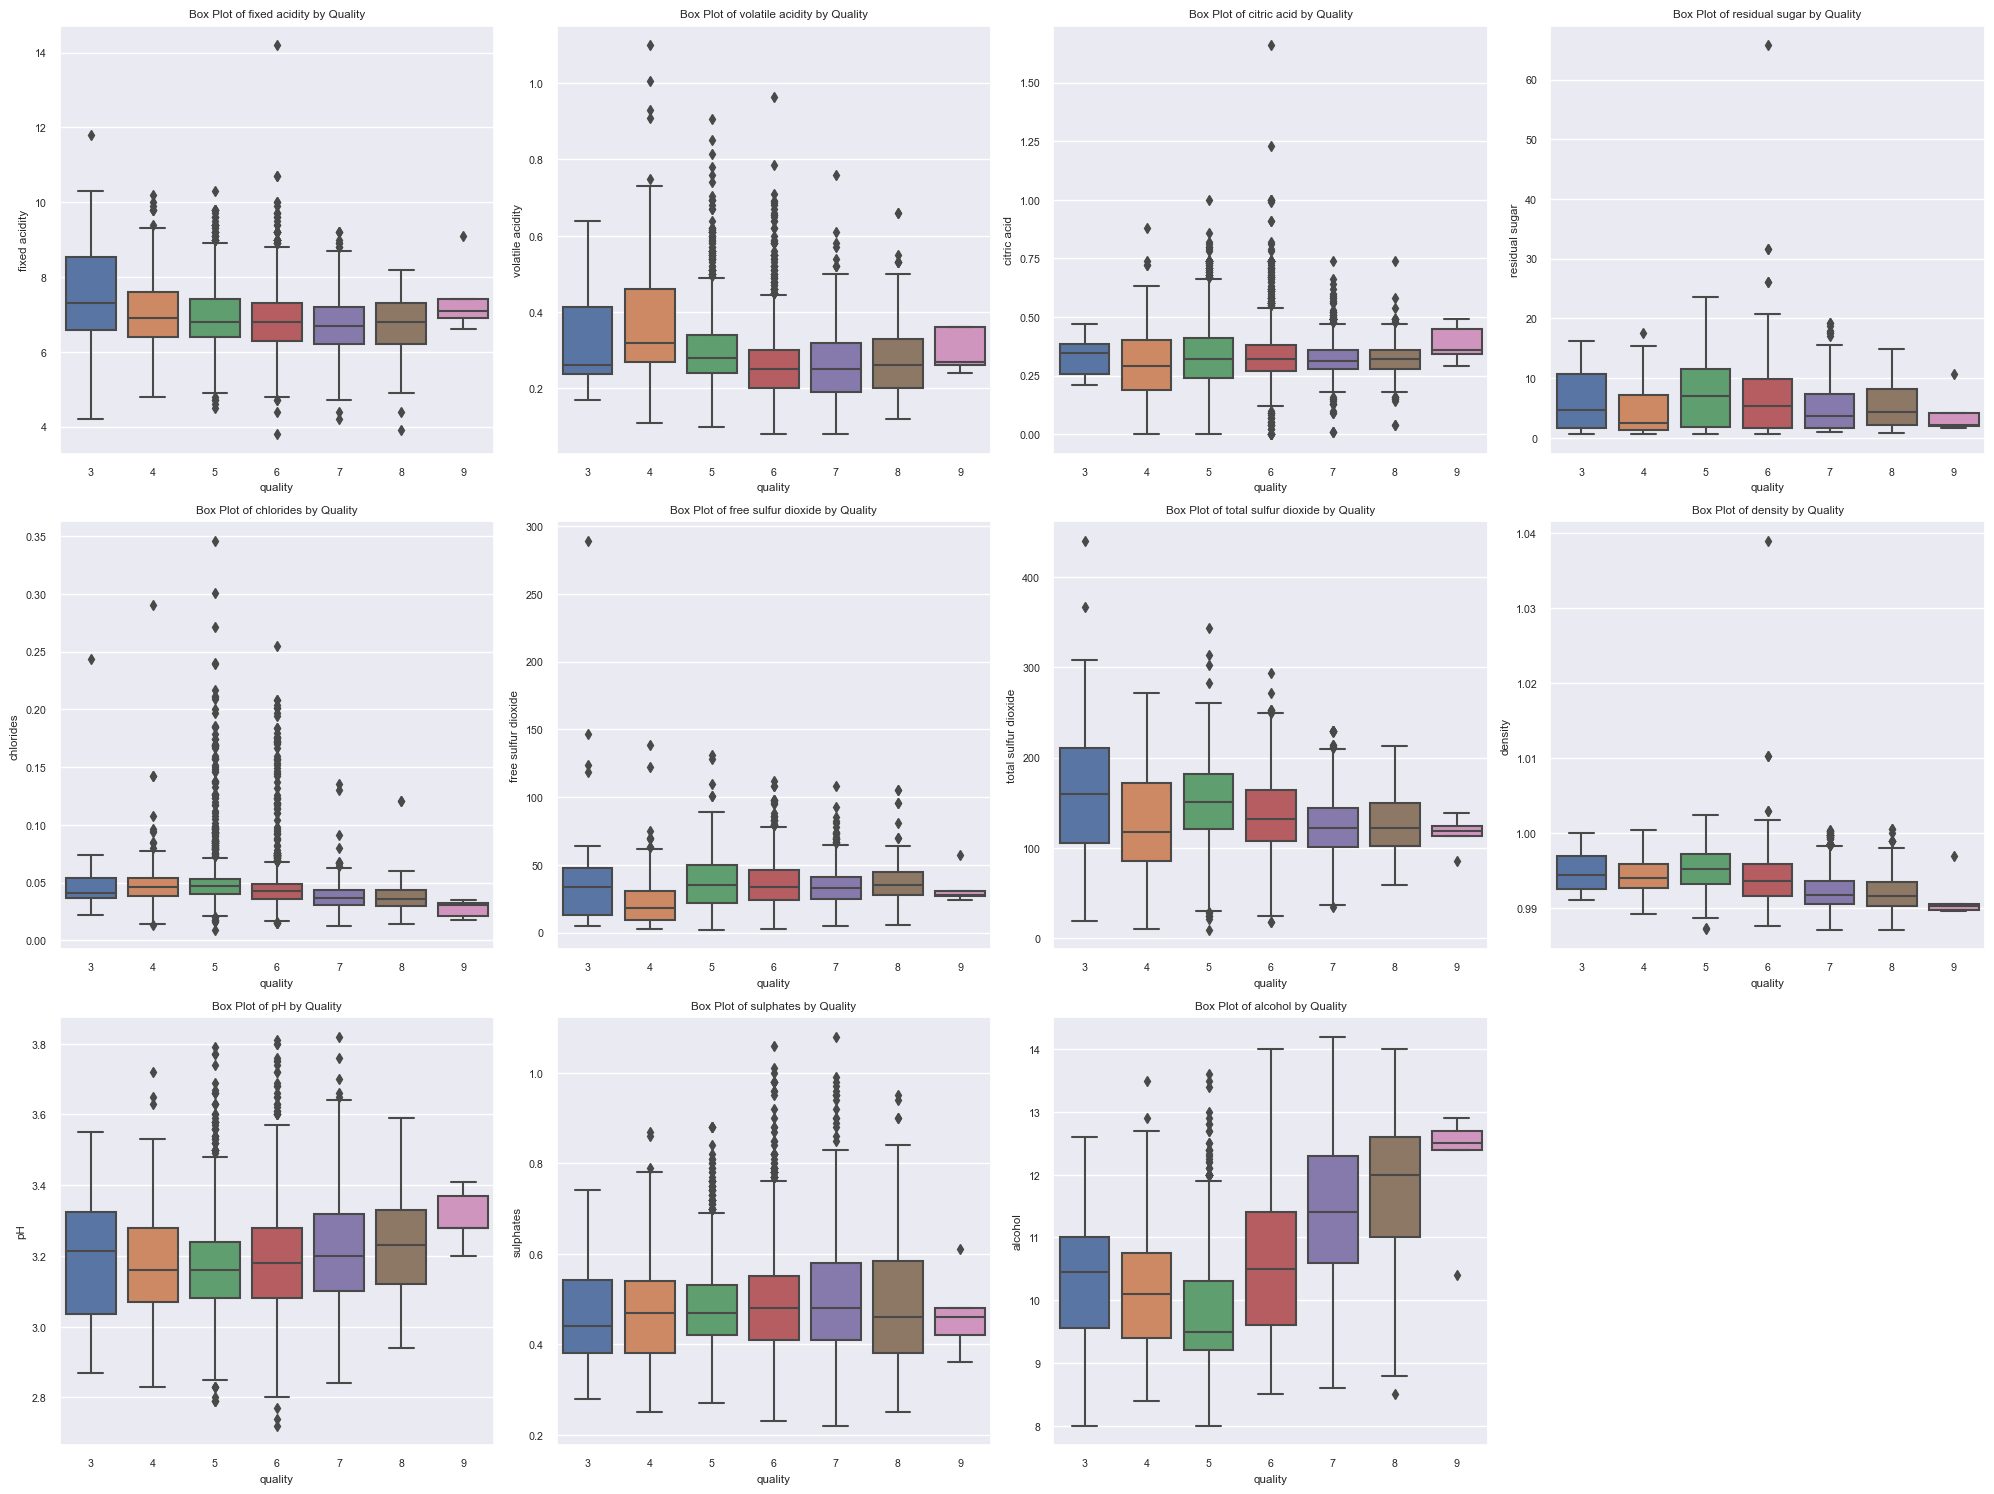

In [349]:
# Create a figure with subplots
plt.figure(figsize=(20, 15))

# Loop through each independent variable in the DataFrame
# Excluding quality
for i, column in enumerate(wdf.columns[:-1]):  
    plt.subplot(3, 4, i + 1)  # Create a subplot for each variable
    sns.boxplot(x=wdf['quality'], y=wdf[column])  
    plt.title(f'Box Plot of {column} by Quality')

plt.tight_layout()  # Adjust the layout
plt.show()

In [334]:
## exploratory data analysis
## correlation matrix

corrmat = wdf.corr(numeric_only=True)
corrmat

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.089021   0.023086            -0.049396   
volatile acidity            0.064286   0.070512            -0.097012   
citric acid                 0.094212   0.114364             0.094077   
residual sugar              1.000000   0.088685             0.299098   
chlorides                   0.088685   1.000000             0.101392   
free sulfur dioxide         0.299098   0.101392             1.000000   
total sulfur dioxide        0.401439   0.198910             0.615501   
density                     0.838966   0.257211             0.294210   
pH                         -0.194133  -0.090439            -0.000618   
sulphates                  -0.026664   0.016763             0.059217   
alcohol                    -0.450631  -0.360189            -0.250104   
quality                    -0.097577  -0.209934             0.008158   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.091070  0.265331 -0.425858  -0.017143   
volatile acidity                  0.089261  0.027114 -0.031915  -0.035728   
citric acid                       0.121131  0.149503 -0.163748   0.062331   
residual sugar                    0.401439  0.838966 -0.194133  -0.026664   
chlorides                         0.198910  0.257211 -0.090439   0.016763   
free sulfur dioxide               0.615501  0.294210 -0.000618   0.059217   
total sulfur dioxide              1.000000  0.529881  0.002321   0.134562   
density                           0.529881  1.000000 -0.093591   0.074493   
pH                                0.002321 -0.093591  1.000000   0.155951   
sulphates                         0.134562  0.074493  0.155951   1.000000   
alcohol                          -0.448892 -0.780138  0.121432  -0.017433   
quality                          -0.174737 -0.307123  0.099427   0.053678   

                       alcohol   quality  
fixed acidity        -0.120881 -0.113663  
volatile acidity      0.067718 -0.194723  
citric acid          -0.075729 -0.009209  
residual sugar       -0.450631 -0.097577  
chlorides            -0.360189 -0.209934  
free sulfur dioxide  -0.250104  0.008158  
total sulfur dioxide -0.448892 -0.174737  
density              -0.780138 -0.307123  
pH                    0.121432  0.099427  
sulphates            -0.017433  0.053678  
alcohol               1.000000  0.435575  
quality               0.435575  1.000000

<Axes: >

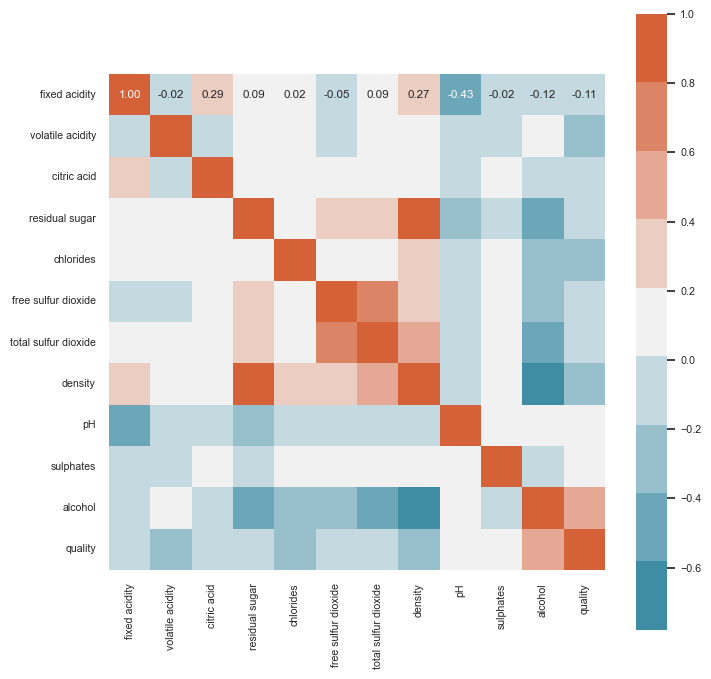

In [335]:
## Heatmap of corelation matrix
cmap = sns.diverging_palette(220, 22, s=80, l=55, n=9)
plt.subplots(figsize=(8,8))
sns. set(font_scale=0.7)
sns.heatmap(corrmat,cmap= cmap,annot=True, fmt='.2f', square=True)

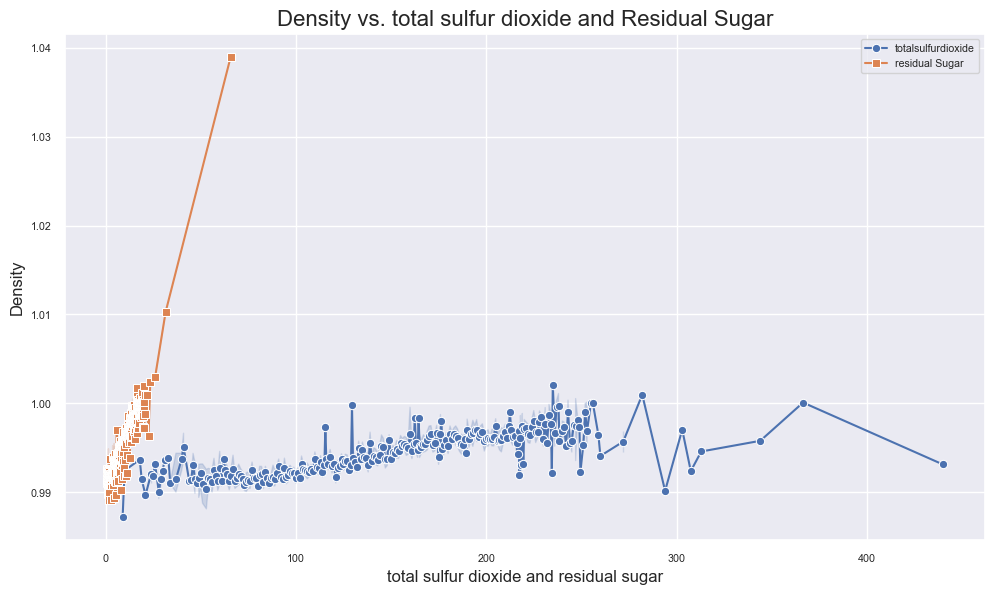

In [346]:
plt.figure(figsize=(10, 6))

# Create line plots for 'alcohol' and 'residual sugar' against 'density'
sns.lineplot(x="total sulfur dioxide", y="density", data=wdf, label='totalsulfurdioxide', marker='o')
sns.lineplot(x="residual sugar", y="density", data=wdf, label='residual Sugar', marker='s')

plt.title("Density vs. total sulfur dioxide and Residual Sugar", fontsize=16)
plt.xlabel("total sulfur dioxide and residual sugar", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

Text(0, 0.5, 'alcohol')

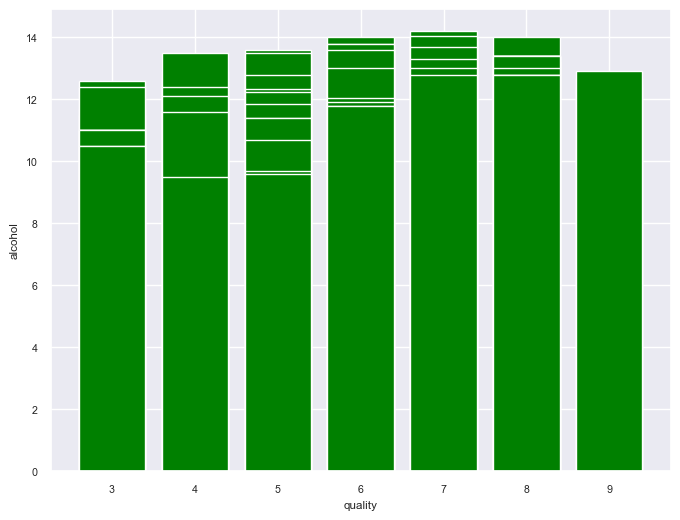

In [338]:
## plot the bar graph to check what value of alcohol makes changes in quality.

plt.figure(figsize=[8,6])
plt.bar(wdf['quality'],wdf['alcohol'],color='green')
plt.xlabel('quality')
plt.ylabel('alcohol')

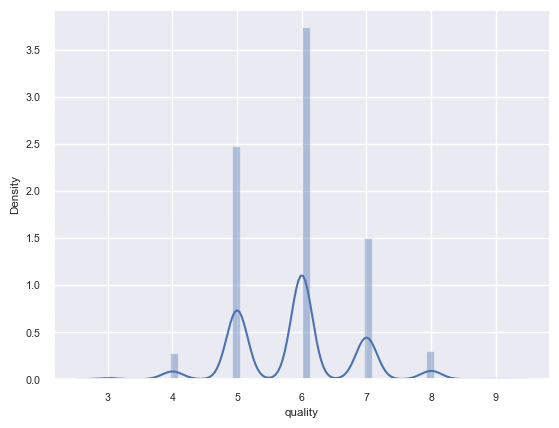

In [337]:
## visualising quality variable
sns_plot = sns.distplot(wdf['quality'])

In [244]:
## identifying the quality unique classifications
wdf['quality'].unique

<bound method Series.unique of 0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64>

<Axes: xlabel='quality', ylabel='count'>

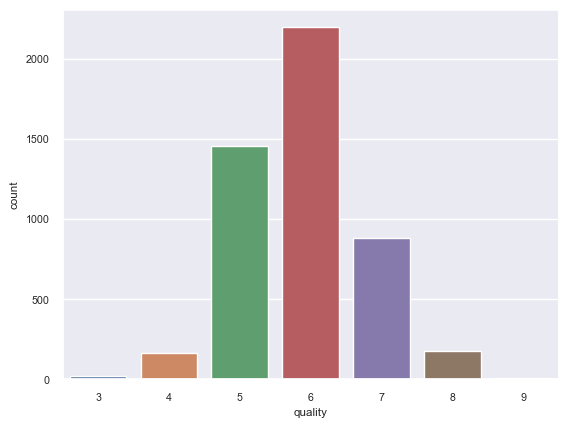

In [347]:
## visualising quality classifications
sns.countplot(wdf, x=wdf['quality'])

In [245]:
df=wdf.drop('quality', axis =1, inplace=True)
 
# Check the data informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
dtypes: float64(11)
memory usage: 421.0 KB


In [362]:
scaler = MinMaxScaler()
 
features =scaler.fit(df)
features =features.transform(df)
 
# Convert to pandas Dataframe
scaled_df =pd.DataFrame(features,columns=df.columns)
# Print the scaled data
scaled_df.head(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.307692          0.186275     0.216867        0.308282   0.106825   
1       0.240385          0.215686     0.204819        0.015337   0.118694   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.149826              0.373550  0.267785  0.254545   0.267442   
1             0.041812              0.285383  0.132832  0.527273   0.313953   

    alcohol  quality  clusters  
0  0.129032      0.5       0.0  
1  0.241935      0.5       0.0

In [363]:
# changing scaled df to an array
X=scaled_df.values

In [364]:
## elbow plot

elb_plot = []
k_rnge = range(1,10)
for k in k_rnge:
    km = KMeans(n_clusters=k)
    km.fit(X)
    elb_plot.append(km.inertia_)      

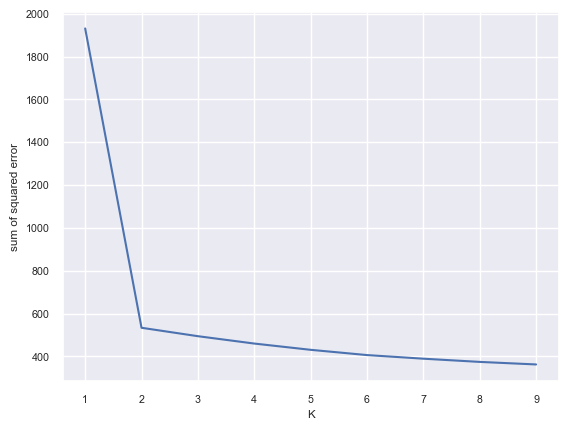

In [365]:
## plot the elbow chart
plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.plot(k_rnge,elb_plot)

In [366]:
## cluster
km = KMeans(n_clusters = 2)
y_predicted = km.fit_predict(X)
y_predicted

array([0, 0, 0, ..., 0, 1, 1], dtype=int32)

In [367]:
## adding clusters to my dataset as target variable
df['clusters'] = y_predicted
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  clusters  
0         8.8        6         0  
1         9.5        6         0  
2        10.1        6         0  
3         9.9        6         0  
4         9.9        6         0  
...       ...      ...       ...  
4893     11.2        6         1  
4894      9.6        5         0  
4895      9.4        6         0  
4896     12.8        7         1  
4897     11.8        6         1  

[4898 rows x 13 columns]

In [368]:
## centroid
km.cluster_centers_

array([[ 3.03174017e-01,  1.95320453e-01,  2.05469734e-01,
         1.21329520e-01,  1.29709761e-01,  1.31296487e-01,
         3.44576370e-01,  1.71275413e-01,  4.08465011e-01,
         3.20244282e-01,  2.53904828e-01,  4.26950088e-01,
        -1.94289029e-15],
       [ 2.82522751e-01,  1.93207283e-01,  1.96396299e-01,
         5.02557378e-02,  8.46810089e-02,  9.79716277e-02,
         2.47413097e-01,  8.83690166e-02,  4.46144481e-01,
         3.06099460e-01,  5.85442828e-01,  5.42187500e-01,
         1.00000000e+00]])

In [369]:
km.labels_

array([0, 0, 0, ..., 0, 1, 1], dtype=int32)

In [370]:
## dimensionality reduction -- PCA
pca=PCA(n_components=2)
 
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
 
#Reduced Features
reduced_X.head()

PCA1      PCA2
0 -0.550483 -0.111325
1 -0.460288  0.114574
2 -0.435271  0.023428
3 -0.469991  0.002045
4 -0.469991  0.002045

In [371]:
centers=pca.transform(km.cluster_centers_)
 
# reduced centers
centers

array([[-0.49029765,  0.00437095],
       [ 0.5817907 , -0.0051866 ]])

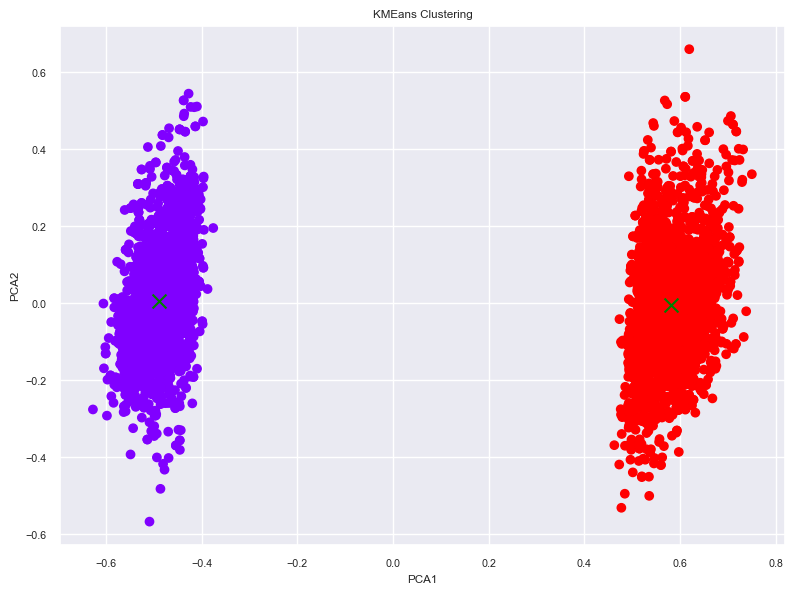

In [412]:
plt.figure(figsize=(8,6))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'], c=km.labels_, cmap='rainbow')
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='green',label='centroid')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('KMEans Clustering')
plt.tight_layout()

In [400]:
## model evaluation
print('WCSS: ', km.inertia_)

WCSS:  533.3984862218697


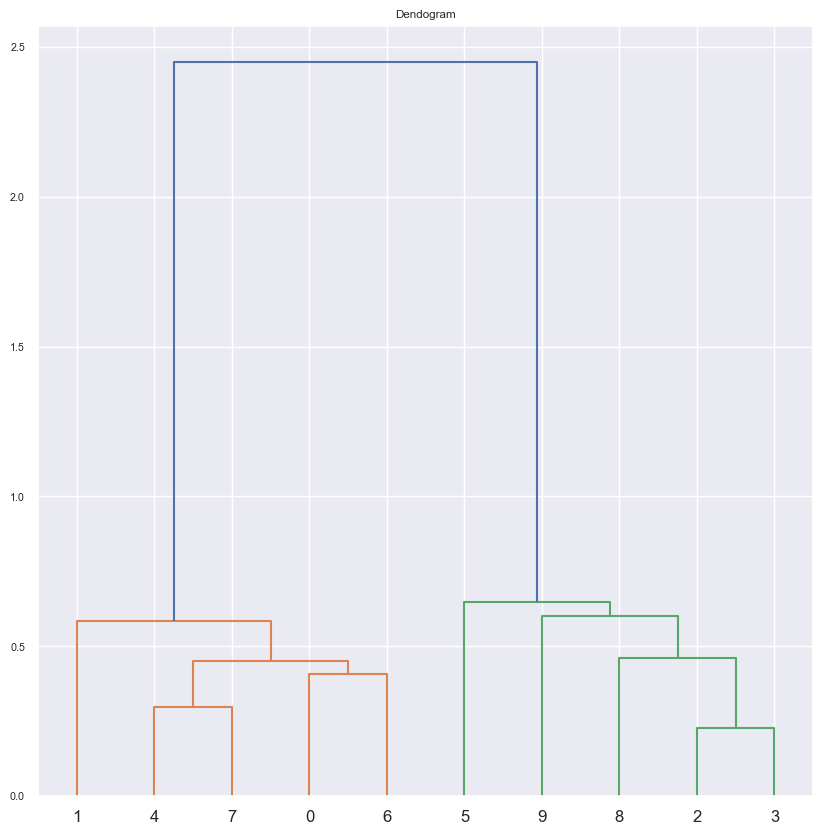

In [401]:
## create dendogram to show relationships
sub_df = scaled_df.sample(n=10)
plt.figure(figsize=(10,10))
plt.title('Dendogram')
dend= shc.dendrogram(shc.linkage(sub_df, method = 'ward'))
plt.show()

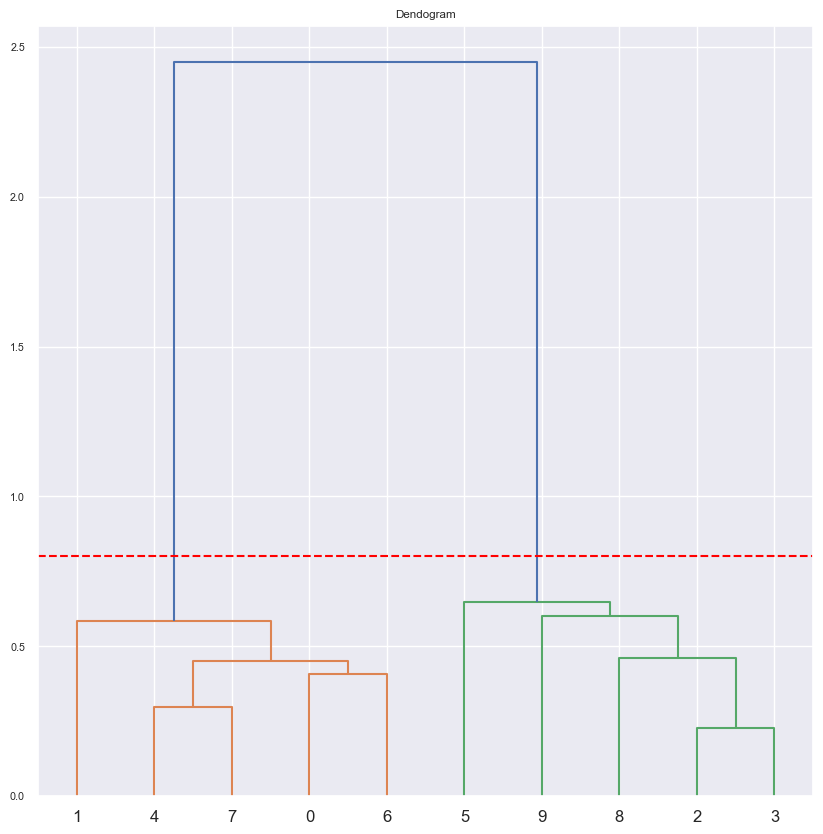

In [402]:
plt.figure(figsize=(10,10))
plt.title('Dendogram')
dend= shc.dendrogram(shc.linkage(sub_df, method = 'ward'))
plt.axhline(y=0.8, color='red', linestyle= '--')

In [403]:
## dimensionality reduction -- PCA
pca=PCA(n_components=2)
 
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
 
#Reduced Features
reduced_X.head()

PCA1      PCA2
0 -0.550483 -0.111325
1 -0.460288  0.114574
2 -0.435271  0.023428
3 -0.469991  0.002045
4 -0.469991  0.002045

In [404]:
## dimensionality reduction -- PCA
pca = PCA(n_components=2)
new_df = pca.fit_transform(scaled_df)
new_df

array([[-0.55048253, -0.11132489],
       [-0.46028781,  0.11457357],
       [-0.43527102,  0.02342794],
       ...,
       [-0.46873522, -0.08895214],
       [ 0.67806748,  0.10354511],
       [ 0.60492686, -0.07218228]])

In [405]:
new_df[:, 0]

array([-0.55048253, -0.46028781, -0.43527102, ..., -0.46873522,
        0.67806748,  0.60492686])

In [406]:
### cluster
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_predicted= cluster.fit_predict(new_df)

In [407]:
scaled_df['clusters'] = y_predicted
scaled_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.307692          0.186275     0.216867        0.308282   0.106825   
1       0.240385          0.215686     0.204819        0.015337   0.118694   
2       0.413462          0.196078     0.240964        0.096626   0.121662   
3       0.326923          0.147059     0.192771        0.121166   0.145401   
4       0.326923          0.147059     0.192771        0.121166   0.145401   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.149826              0.373550  0.267785  0.254545   0.267442   
1             0.041812              0.285383  0.132832  0.527273   0.313953   
2             0.097561              0.204176  0.154039  0.490909   0.255814   
3             0.156794              0.410673  0.163678  0.427273   0.209302   
4             0.156794              0.410673  0.163678  0.427273   0.209302   

    alcohol  quality  clusters  
0  0.129032      0.5         1  
1  0.241935      0.5         1  
2  0.338710      0.5         1  
3  0.306452      0.5         1  
4  0.306452      0.5         1

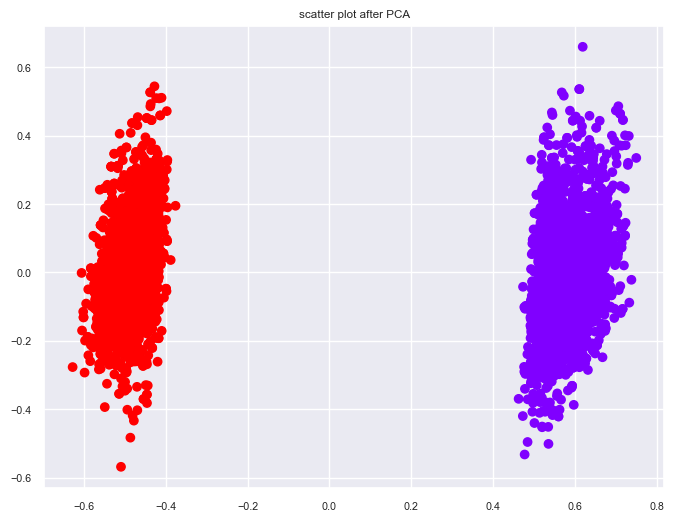

In [413]:
## scatter plot

plt.figure(figsize=(8,6))
plt.scatter(new_df[:,0], new_df[:,1], c=cluster.labels_, cmap='rainbow')
plt.title('scatter plot after PCA')
plt.show()